# Running 3 Methods with Simulated Scenarios for Benchmarking

In [1]:
import os
import sys
import feather
import warnings

import numpy as np # Numerical computing
import pandas as pd # Data manipulation

import seaborn as sns # R-like high-level plots
import matplotlib.pyplot as plt # Python's base plotting 

sys.path.append('../')
from src import utils, plots, tests

warnings.filterwarnings('ignore')
# Initialize the timer
startTime = utils.getTime()

In [2]:
# Create a dictionary for a greyscale color palette with 9 colors
def_colors = [
    "#139593", "#fca311", "#e54f2a",
    "#c3c3c3", "#555555",
    "#690000", "#5f4a00", "#004549"
]

# Set seaborn style
sns.set_theme(
    style="white",
    context="paper",
    palette=def_colors,
    font_scale=1,
    rc={
        "figure.figsize": (6, 4),
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
    }
)

# Figure Saving Settings
figure_formats = ["png", "pdf"]
save_to_folder = True
transparet_bg = True
figure_dpi = 300

## Configure dataframe displaying
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)


In [3]:
notebook_name = "3_running"
data_path = "./data/prepared/"
output_path = f"./data/results/"
figure_path = f"./figures/{notebook_name}/"

# Create the output folder if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Create figure folder structure, if needed
if save_to_folder:
    for i in figure_formats:
        cur_folder = figure_path + i + "/"
        if not os.path.exists(cur_folder):
            os.makedirs(cur_folder)

In [4]:
# Threshold to use
pThr = 0.001 
# Storage for various results
results_dict = {}
# Setup for the ROC curve
thresholds = list(utils.generate_thresholds(10.0, -15, 1, 0, 1, 0.1))
print(f"{len(thresholds)} P-value Thresholds for ROC building:")
for i in thresholds: 
    #Print Cleanly with scientific notation
    print(f"{i:.2e}")

25 P-value Thresholds for ROC building:
0.00e+00
1.00e-15
1.00e-14
1.00e-13
1.00e-12
1.00e-11
1.00e-10
1.00e-09
1.00e-08
1.00e-07
1.00e-06
1.00e-05
1.00e-04
1.00e-03
1.00e-02
1.00e-01
2.00e-01
3.00e-01
4.00e-01
5.00e-01
6.00e-01
7.00e-01
8.00e-01
9.00e-01
1.00e+00


# Individual Methods Analysis

## Setup the Input Data to Send to R Scripts

Data for the 6 distinct benchmark scenarios is generated in the following way:

In [5]:
# Open single data for cond_run_dict
data = feather.read_dataframe(f"{data_path}bench_1pep_input.feather")
# Create day:[filenames] dictionary
cond_run_dict = data.groupby(["day"]).apply(lambda x: list(x["filename"].unique())).to_dict()
cond_run_dict

{'day1': ['S1_SW_day1',
  'S2_SW_day1',
  'S3_SW_day1',
  'S4_SW_day1_rep1',
  'S4_SW_day1_rep2',
  'S4_SW_day1_rep3',
  'S5_SW_day1'],
 'day3': ['S1_SW_day3',
  'S2_SW_day3',
  'S3_SW_day3',
  'S4_SW_day3_rep1',
  'S4_SW_day3_rep2',
  'S4_SW_day3_rep3',
  'S5_SW_day3'],
 'day5': ['S1_SW_day5',
  'S2_SW_day5',
  'S3_SW_day5',
  'S4_SW_day5_rep1',
  'S4_SW_day5_rep2',
  'S4_SW_day5_rep3',
  'S5_SW_day5']}

## COPF - Correlation based Approach to Identify Proteoforms

In [6]:
curMethod = 'COPF'
pval_col = "proteoform_score_pval_adj"

### One perturbed Peptide Data

**Running the method**

In [7]:
# Run the COPF algorithm on the data
!Rscript ./runCOPF.R "1pep"

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.
Data read from ./data/prepared/bench_1pep_input.feather with 467187 rows and 10 columns.
No protein mass annotation found, PCprofiler continues without mass annotation.
Data placed into trace structure from ccprofiler 22247 rows and 7 columns.
Running the clustering... 
Calculating proteoform scores... 
Saving the proteoform results into a feather file... 
COPF logic run on data in 18.92 seconds

**Quick look with ROC and AUC**

Loaded COPF results with shape: (22247, 16)


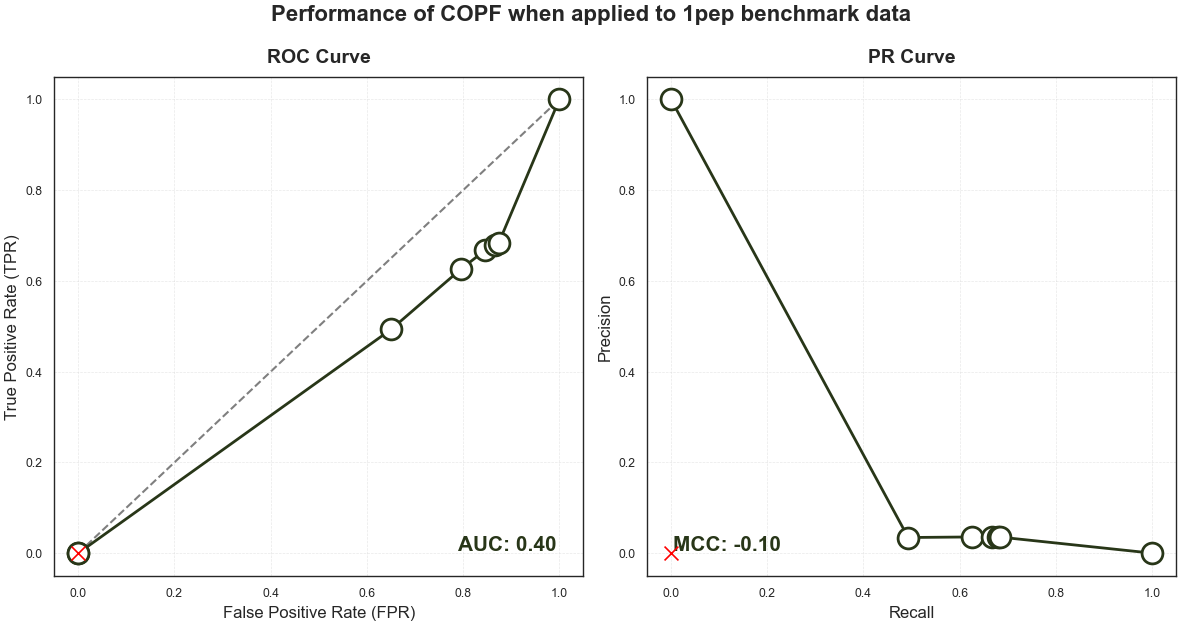

In [8]:
dataID = "1pep"
res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded COPF results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Two perturbed Peptides Data

**Running the method**

In [9]:
# Run the COPF algorithm on the data
!Rscript ./runCOPF.R "2pep"

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.
Data read from ./data/prepared/bench_2pep_input.feather with 467187 rows and 10 columns.
No protein mass annotation found, PCprofiler continues without mass annotation.
Data placed into trace structure from ccprofiler 22247 rows and 7 columns.
Running the clustering... 
Calculating proteoform scores... 
Saving the proteoform results into a feather file... 
COPF logic run on data in 18.57 seconds

**Quick look with ROC and AUC**

Loaded COPF results with shape: (22247, 16)


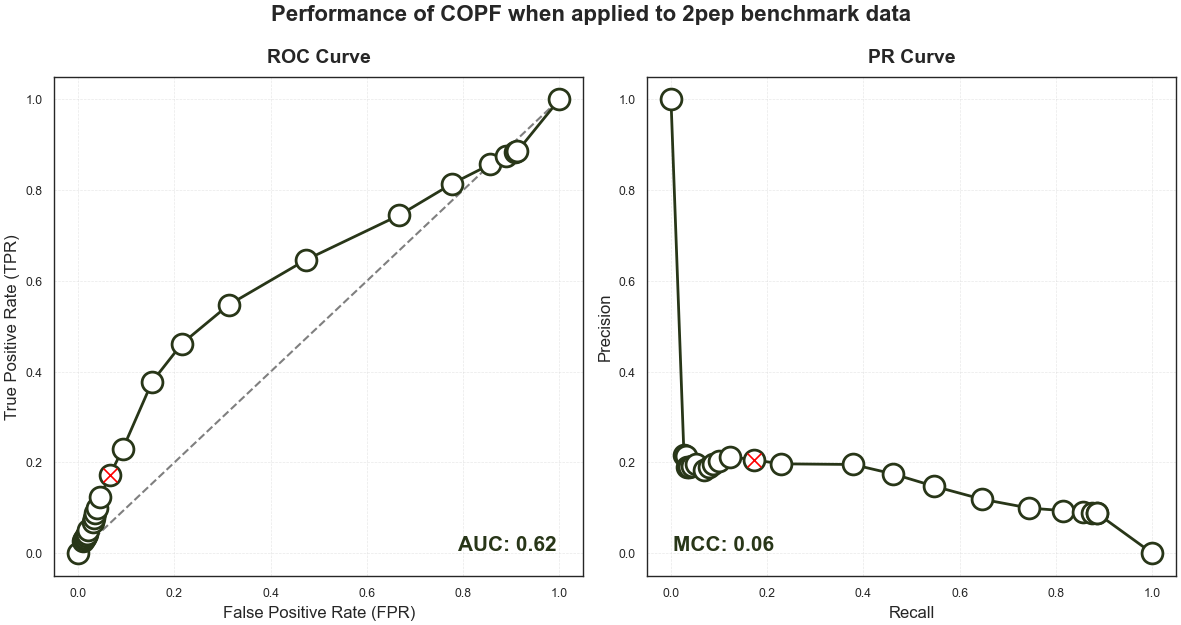

In [10]:
dataID = "2pep"
res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded COPF results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Half perturbed Peptide Data

**Running the method**

In [11]:
# Run the COPF algorithm on the data
!Rscript ./runCOPF.R "050pep"

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.
Data read from ./data/prepared/bench_050pep_input.feather with 467187 rows and 10 columns.
No protein mass annotation found, PCprofiler continues without mass annotation.
Data placed into trace structure from ccprofiler 22247 rows and 7 columns.
Running the clustering... 
Calculating proteoform scores... 
Saving the proteoform results into a feather file... 
COPF logic run on data in 18.44 seconds

**Quick look with ROC and AUC**

Loaded COPF results with shape: (22247, 16)


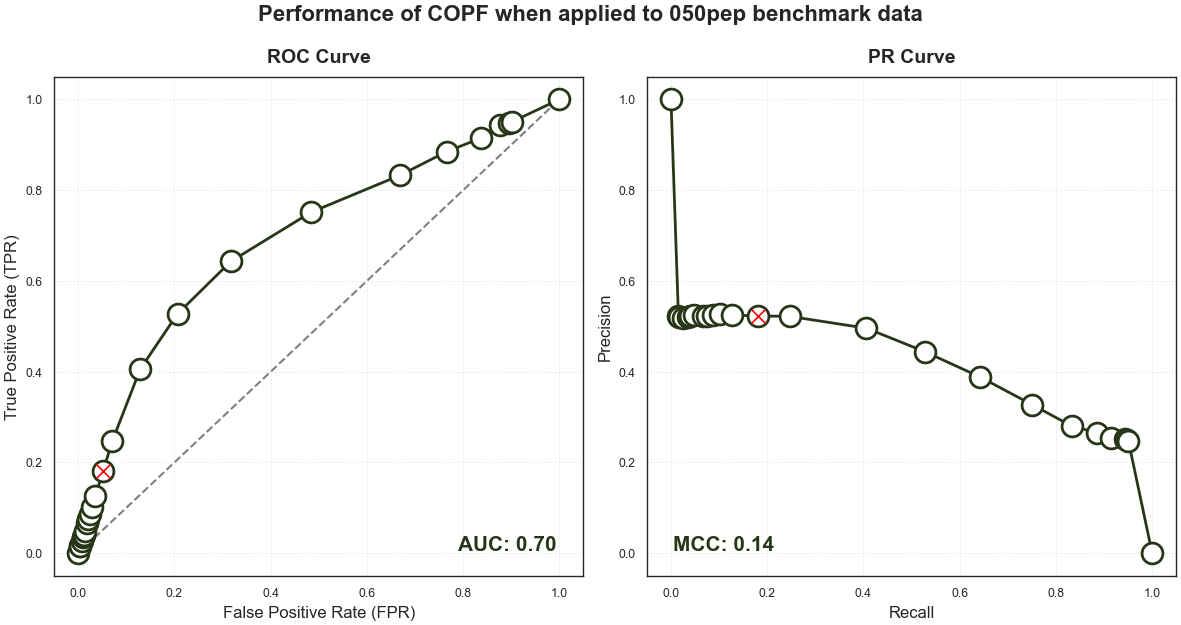

In [12]:
dataID = "050pep"

res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded COPF results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Random Number of Peptides up to 50% Perturbed

**Running the method**

In [13]:
# Run the COPF algorithm on the data
!Rscript ./runCOPF.R "random"

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.
Data read from ./data/prepared/bench_random_input.feather with 467187 rows and 10 columns.
No protein mass annotation found, PCprofiler continues without mass annotation.
Data placed into trace structure from ccprofiler 22247 rows and 7 columns.
Running the clustering... 
Calculating proteoform scores... 
Saving the proteoform results into a feather file... 
COPF logic run on data in 18.51 seconds

**Quick look with ROC and AUC**

Loaded COPF results with shape: (22247, 16)


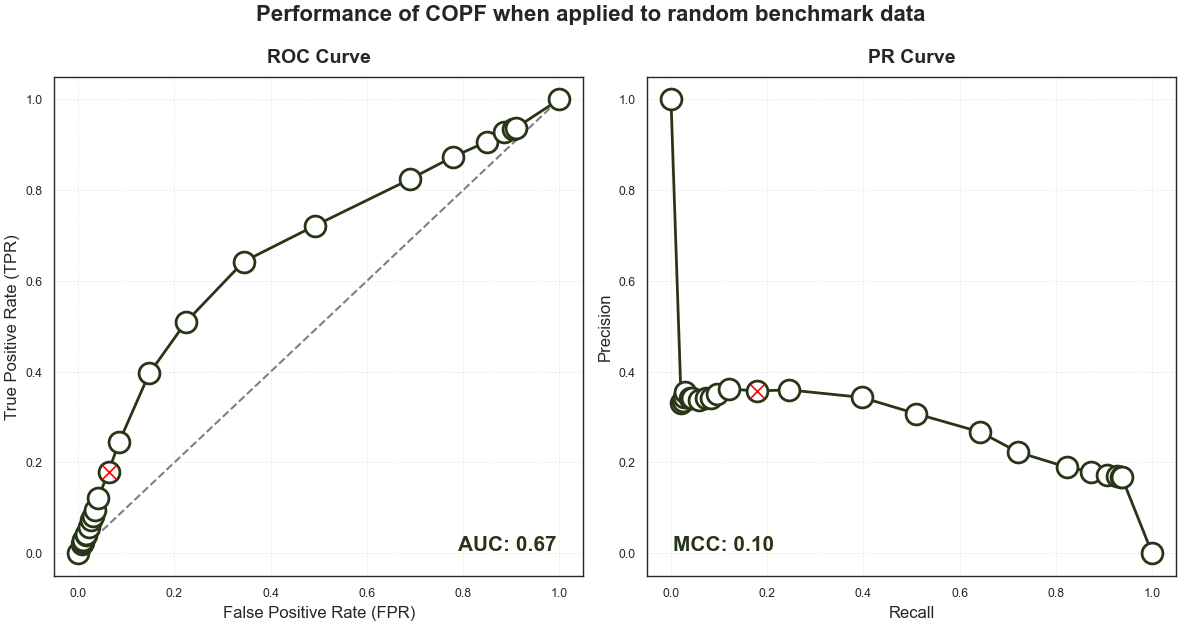

In [14]:
dataID = "random"

res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded COPF results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)
_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

## PeCorA - Peptide Correlation Analysis

In [15]:
curMethod = 'PeCorA'
pval_col = "adj_adj_pval"

### One Permutated Peptide per Perturbed Proteins

**Running the method**

In [16]:
# Run the PeCorA algorithm on the data
!Rscript ./runPeCorA.R "1pep"

Data read from ./data/prepared/bench_1pep_input.feather with 467187 rows and 10 columns.
[1] "scaling peptides to control == 0"
  |======================================================================| 100%[1] " "
[1] "peptide scaling completed in 2.08 minutes"
[1] "checking which proteins still have at least 2 peptides"
[1] "computing the interaction p-values"
  |======================================================================| 100%[1] " "
[1] "PeCorA finished in 2.23 minutes"
[1] "number of proteins tested = 2217"
[1] "number of peptides tested = 22246"
[1] "started making data table"
[1] "correcting p-values"
[1] "number of uncorrelated peptides = 3866"
[1] "number of proteins with uncorrelated peptides = 1984"
Saving the proteoform results into a feather file... 
PeCorA logic run on data in 4.99 minutes

**Quick look with ROC and AUC**

Loaded PeCorA results with shape: (22246, 11)


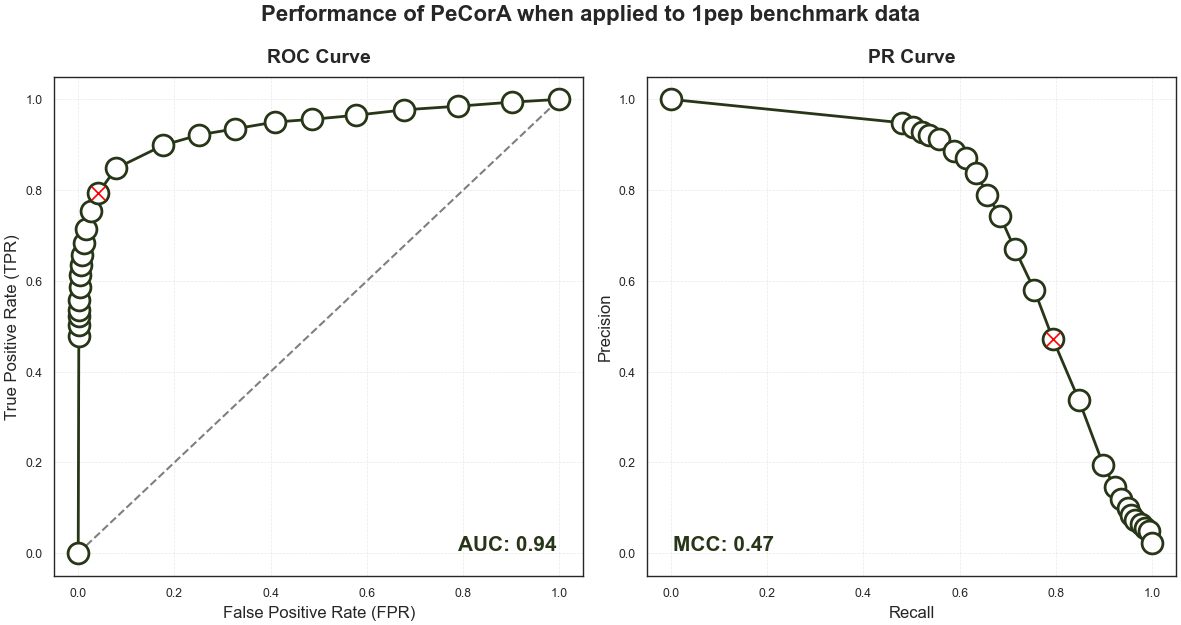

In [17]:
dataID = "1pep"

res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded PeCorA results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Two Permutated Peptides per Perturbed Proteins

**Running the method**

In [18]:
# Run the PeCorA algorithm on the data
!Rscript ./runPeCorA.R "2pep"

Data read from ./data/prepared/bench_2pep_input.feather with 467187 rows and 10 columns.
[1] "scaling peptides to control == 0"
  |======================================================================| 100%[1] " "
[1] "peptide scaling completed in 2.08 minutes"
[1] "checking which proteins still have at least 2 peptides"
[1] "computing the interaction p-values"
  |======================================================================| 100%[1] " "
[1] "PeCorA finished in 2.18 minutes"
[1] "number of proteins tested = 2217"
[1] "number of peptides tested = 22246"
[1] "started making data table"
[1] "correcting p-values"
[1] "number of uncorrelated peptides = 4960"
[1] "number of proteins with uncorrelated peptides = 2015"
Saving the proteoform results into a feather file... 
PeCorA logic run on data in 4.92 minutes

**Quick look with ROC and AUC**

Loaded PeCorA results with shape: (22246, 11)


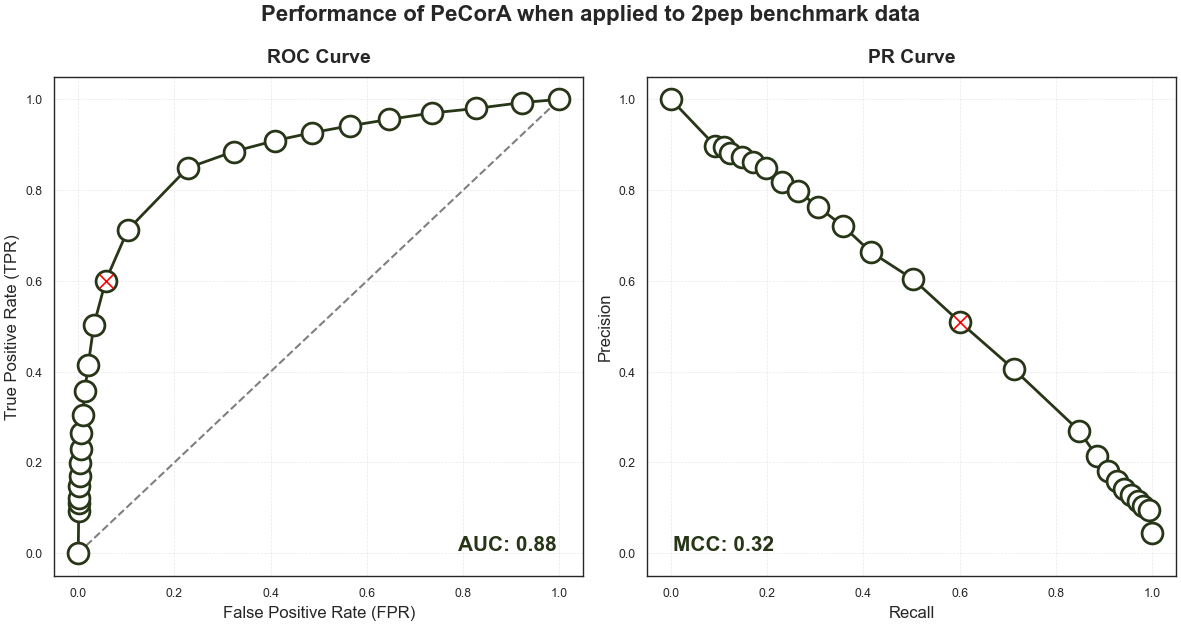

In [19]:
dataID = "2pep"

res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded PeCorA results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Half of Peptides Perturbed

**Running the method**

In [20]:
# Run the PeCorA algorithm on the data
!Rscript ./runPeCorA.R "050pep"

Data read from ./data/prepared/bench_050pep_input.feather with 467187 rows and 10 columns.
[1] "scaling peptides to control == 0"
  |======================================================================| 100%[1] " "
[1] "peptide scaling completed in 2.1 minutes"
[1] "checking which proteins still have at least 2 peptides"
[1] "computing the interaction p-values"
  |======================================================================| 100%[1] " "
[1] "PeCorA finished in 2.21 minutes"
[1] "number of proteins tested = 2217"
[1] "number of peptides tested = 22246"
[1] "started making data table"
[1] "correcting p-values"
[1] "number of uncorrelated peptides = 7479"
[1] "number of proteins with uncorrelated peptides = 2051"
Saving the proteoform results into a feather file... 
PeCorA logic run on data in 4.98 minutes

**Quick look with ROC and AUC**

Loaded PeCorA results with shape: (22246, 11)


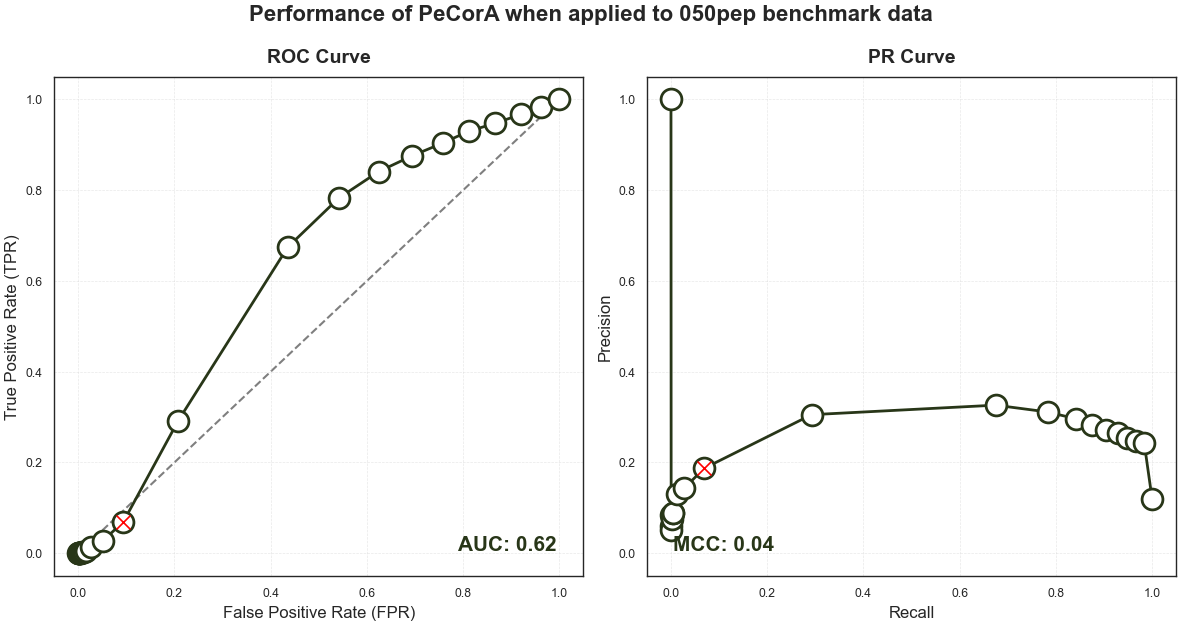

In [21]:
dataID = "050pep"

res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded PeCorA results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Random Number of Peptides up to Half Perturbed

**Running the method**

In [22]:
# Run the PeCorA algorithm on the data
!Rscript ./runPeCorA.R "random"

Data read from ./data/prepared/bench_random_input.feather with 467187 rows and 10 columns.
[1] "scaling peptides to control == 0"
  |======================================================================| 100%[1] " "
[1] "peptide scaling completed in 2.08 minutes"
[1] "checking which proteins still have at least 2 peptides"
[1] "computing the interaction p-values"
  |======================================================================| 100%[1] " "
[1] "PeCorA finished in 2.23 minutes"
[1] "number of proteins tested = 2217"
[1] "number of peptides tested = 22246"
[1] "started making data table"
[1] "correcting p-values"
[1] "number of uncorrelated peptides = 6400"
[1] "number of proteins with uncorrelated peptides = 2034"
Saving the proteoform results into a feather file... 
PeCorA logic run on data in 4.98 minutes

**Quick look with ROC and AUC**

Loaded PeCorA results with shape: (22246, 11)


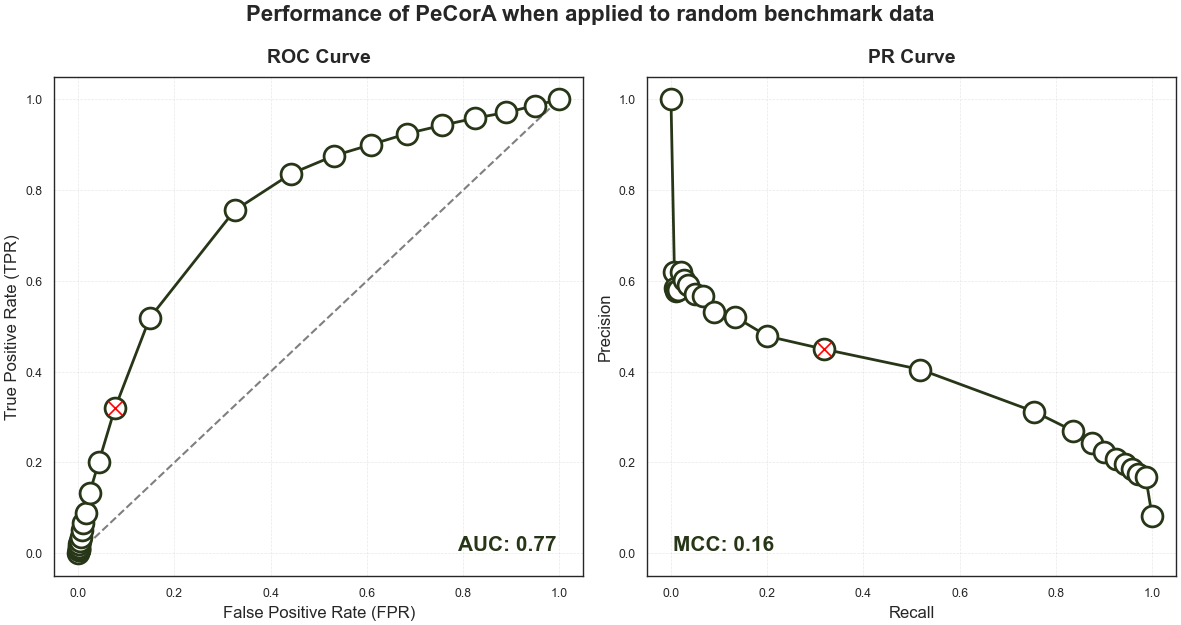

In [23]:
dataID = "random"

res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")
print("Loaded PeCorA results with shape:", res_data.shape)
# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

## ProteoForge - Proteoform Identification with Weighted Least Squares

In [59]:
curMethod = 'ProteoForge'
pval_col = "adj_pval"
from importlib import reload
reload(tests);

### One Permuted Peptide per Protein

**Running the method**

In [60]:
dataID = "1pep"

# Load the data
print(f"Running {curMethod} on the data for {dataID}")

### Commented out to save time

test_data = feather.read_dataframe(f"{data_path}bench_{dataID}_input.feather")
print(" Loaded data with shape:", test_data.shape)

# Normalize the data
test_data = utils.normalize_against_condition(
    test_data,
    cond_run_dict = cond_run_dict,
    run_col = "filename",                 
    index_cols = ["protein_id", "peptide_id"], 
    norm_against = "day1",                
    intensity_col = "intensity",          
    is_log2 = False,                     
    norm_intensity_col = "ms1adj"   
)
print(" Normalized data with added ms1adj column with shape:", test_data.shape)

# Useful for ensuring the values are between 0 and 1
def min_max_scale(x): return (x - x.min()) / (x.max() - x.min())
## Technical Replicate Variance (1 = Low, 0 = High)
# Calculate tec variance per protein-peptide-condition
test_data['TechVar'] = test_data.groupby([ 
    'protein_id', 'peptide_id', 'day'
])['ms1adj'].transform('var')
# Min-max scaling of the technical variance and inverse
test_data['TechVar'] = 1 - min_max_scale(test_data['TechVar'])
x = test_data.groupby(['protein_id', 'peptide_id', 'day'])['intensity'].median().unstack()
x = x.div(x['day1'], axis=0)
x = x[['day3', 'day5']]
x['day3-5'] = np.log2(np.abs(x['day3'] - x['day5']))
x['minmax(day3-5)'] = min_max_scale(x['day3-5'])
x['direction'] = np.sign(x['day3-5'])
x['dirDominance'] = 1 - (x.groupby('protein_id')['direction'].transform(lambda s: s.map(s.value_counts(normalize=True))))
test_data = test_data.merge(x[['minmax(day3-5)', 'dirDominance']].reset_index(), on=['protein_id', 'peptide_id'])
# test_data['Weight'] = test_data['TechVar']
test_data['Weight'] = min_max_scale(
    (1) + # Imputation Weight
    (test_data['TechVar'] * 0.25) +
    (test_data['minmax(day3-5)'] * 0.50) +
    (test_data['dirDominance'] * 0.50)
)

# Run the model
res_data = tests.run_model(
    test_data,
    cond_col="day",
    intensity_col="ms1adj",
    protein_col="protein_id",
    peptide_col="peptide_id",
    correction_type="fdr",
    model_type="wls",
    weight_col="Weight",
)
print(" Model run on data with shape:", res_data.shape)
# Save data to a feather file
res_data.to_feather(f"{output_path}{curMethod}_{dataID}_result.feather")

### Commented out to save time

# Read the result
res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")

# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

Running ProteoForge on the data for 1pep
 Loaded data with shape: (467187, 10)
 Normalized data with added ms1adj column with shape: (467187, 11)


100%|██████████| 2217/2217 [02:49<00:00, 13.04it/s]


 Model run on data with shape: (467187, 17)


**Quick look with ROC and AUC**

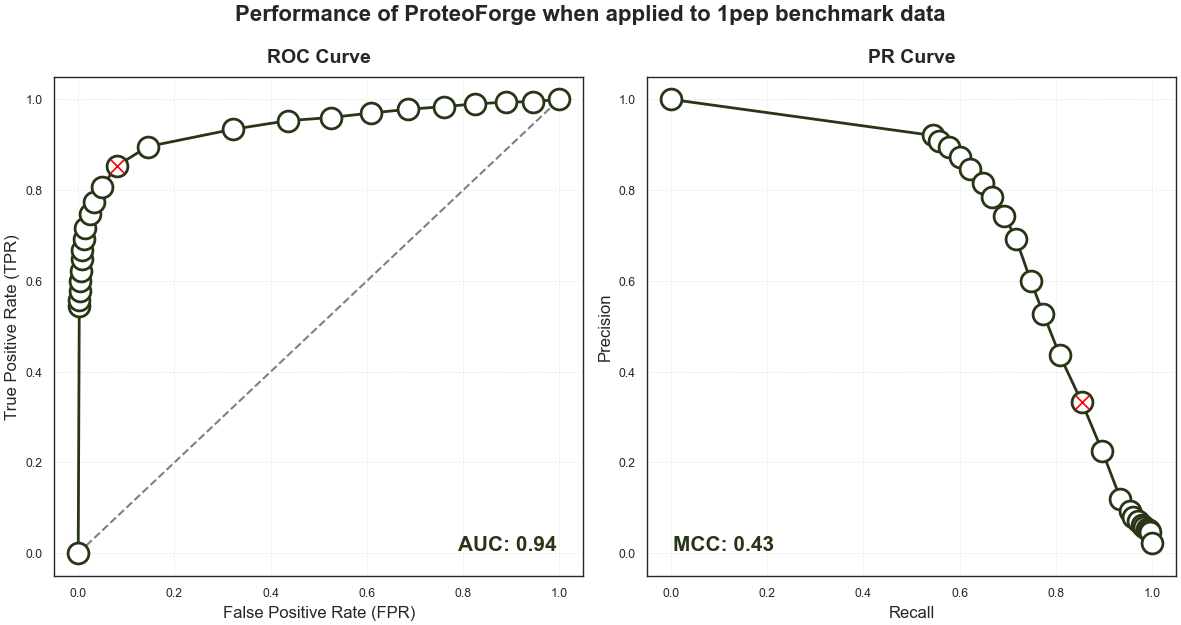

In [61]:
# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Two Permuted Peptides per Protein

**Running the method**

In [62]:
dataID = "2pep"

# Load the data
print(f"Running {curMethod} on the data for {dataID}")

### Commented out to save time

test_data = feather.read_dataframe(f"{data_path}bench_{dataID}_input.feather")
print(" Loaded data with shape:", test_data.shape)

# Normalize the data
test_data = utils.normalize_against_condition(
    test_data,
    cond_run_dict = cond_run_dict,
    run_col = "filename",                 
    index_cols = ["protein_id", "peptide_id"], 
    norm_against = "day1",                
    intensity_col = "intensity",          
    is_log2 = False,                     
    norm_intensity_col = "ms1adj"   
)

# Useful for ensuring the values are between 0 and 1
def min_max_scale(x): return (x - x.min()) / (x.max() - x.min())
## Technical Replicate Variance (1 = Low, 0 = High)
# Calculate tec variance per protein-peptide-condition
test_data['TechVar'] = test_data.groupby([ 
    'protein_id', 'peptide_id', 'day'
])['ms1adj'].transform('var')
# Min-max scaling of the technical variance and inverse
test_data['TechVar'] = 1 - min_max_scale(test_data['TechVar'])
x = test_data.groupby(['protein_id', 'peptide_id', 'day'])['intensity'].median().unstack()
x = x.div(x['day1'], axis=0)
x = x[['day3', 'day5']]
x['day3-5'] = np.log2(np.abs(x['day3'] - x['day5']))
x['minmax(day3-5)'] = min_max_scale(x['day3-5'])
x['direction'] = np.sign(x['day3-5'])
x['dirDominance'] = 1 - (x.groupby('protein_id')['direction'].transform(lambda s: s.map(s.value_counts(normalize=True))))
test_data = test_data.merge(x[['minmax(day3-5)', 'dirDominance']].reset_index(), on=['protein_id', 'peptide_id'])
# test_data['Weight'] = test_data['TechVar']
test_data['Weight'] = min_max_scale(
    (1) + # Imputation Weight
    (test_data['TechVar'] * 0.25) +
    (test_data['minmax(day3-5)'] * 0.50) +
    (test_data['dirDominance'] * 0.50)
)

# Run the model
res_data = tests.run_model(
    test_data,
    cond_col="day",
    intensity_col="ms1adj",
    protein_col="protein_id",
    peptide_col="peptide_id",
    correction_type="fdr",
    model_type="wls",
    weight_col="Weight",
)
print(" Model run on data with shape:", res_data.shape)
# Save data to a feather file
res_data.to_feather(f"{output_path}{curMethod}_{dataID}_result.feather")

### Commented out to save time

# Read the result
res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")

# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

Running ProteoForge on the data for 2pep
 Loaded data with shape: (467187, 10)


100%|██████████| 2217/2217 [02:49<00:00, 13.08it/s]


 Model run on data with shape: (467187, 17)


**Quick look with ROC and AUC**

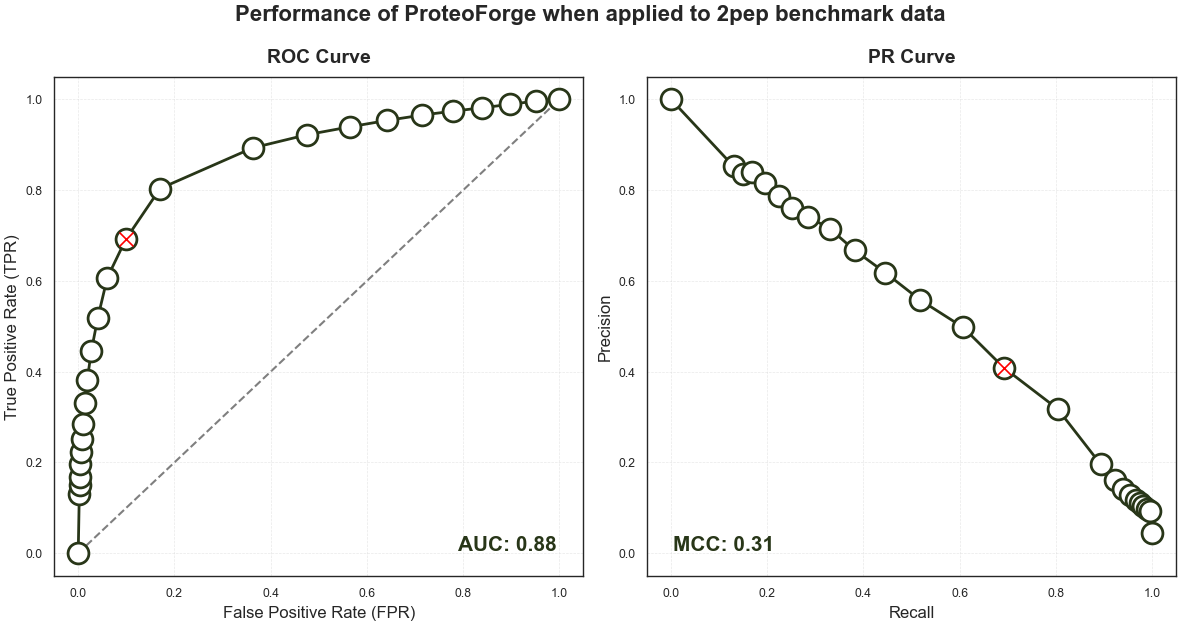

In [63]:
# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Half of Peptides Perturbed

**Running the method**

In [64]:
dataID = "050pep"

# Load the data
print(f"Running {curMethod} on the data for {dataID}")

### Commented out to save time

test_data = feather.read_dataframe(f"{data_path}bench_{dataID}_input.feather")
print(" Loaded data with shape:", test_data.shape)

# Normalize the data
test_data = utils.normalize_against_condition(
    test_data,
    cond_run_dict = cond_run_dict,
    run_col = "filename",                 
    index_cols = ["protein_id", "peptide_id"], 
    norm_against = "day1",                
    intensity_col = "intensity",          
    is_log2 = False,                     
    norm_intensity_col = "ms1adj"   
)
print(" Normalized data with added ms1adj column with shape:", test_data.shape)

# Useful for ensuring the values are between 0 and 1
def min_max_scale(x): return (x - x.min()) / (x.max() - x.min())
## Technical Replicate Variance (1 = Low, 0 = High)
# Calculate tec variance per protein-peptide-condition
test_data['TechVar'] = test_data.groupby([ 
    'protein_id', 'peptide_id', 'day'
])['ms1adj'].transform('var')
# Min-max scaling of the technical variance and inverse
test_data['TechVar'] = 1 - min_max_scale(test_data['TechVar'])
x = test_data.groupby(['protein_id', 'peptide_id', 'day'])['intensity'].median().unstack()
x = x.div(x['day1'], axis=0)
x = x[['day3', 'day5']]
x['day3-5'] = np.log2(np.abs(x['day3'] - x['day5']))
x['minmax(day3-5)'] = min_max_scale(x['day3-5'])
x['direction'] = np.sign(x['day3-5'])
x['dirDominance'] = 1 - (x.groupby('protein_id')['direction'].transform(lambda s: s.map(s.value_counts(normalize=True))))
test_data = test_data.merge(x[['minmax(day3-5)', 'dirDominance']].reset_index(), on=['protein_id', 'peptide_id'])
# test_data['Weight'] = test_data['TechVar']
test_data['Weight'] = min_max_scale(
    (1) + # Imputation Weight
    (test_data['TechVar'] * 0.25) +
    (test_data['minmax(day3-5)'] * 0.50) +
    (test_data['dirDominance'] * 0.50)
)

# Run the model
res_data = tests.run_model(
    test_data,
    cond_col="day",
    intensity_col="ms1adj",
    protein_col="protein_id",
    peptide_col="peptide_id",
    correction_type="fdr",
    model_type="mqr",
    weight_col="Weight",
)
print(" Model run on data with shape:", res_data.shape)
# Save data to a feather file
res_data.to_feather(f"{output_path}{curMethod}_{dataID}_result.feather")

### Commented out to save time

# Read the result
res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")

# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

Running ProteoForge on the data for 050pep
 Loaded data with shape: (467187, 10)
 Normalized data with added ms1adj column with shape: (467187, 11)


100%|██████████| 2217/2217 [04:22<00:00,  8.43it/s]


 Model run on data with shape: (467187, 17)


**Quick look with ROC and AUC**

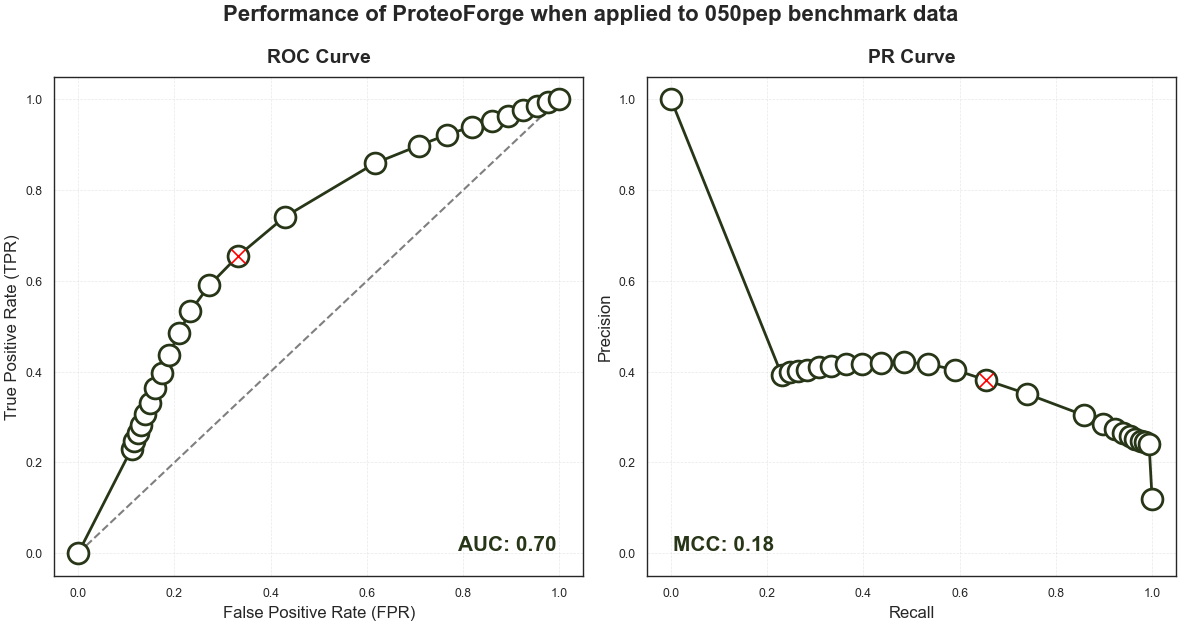

In [65]:
# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

### Random Number of Peptides up to Half Perturbed

**Running the method**

In [66]:
dataID = "random"

# Load the data
print(f"Running {curMethod} on the data for {dataID}")

### Commented out to save time

test_data = feather.read_dataframe(f"{data_path}bench_{dataID}_input.feather")
print(" Loaded data with shape:", test_data.shape)

# Normalize the data
test_data = utils.normalize_against_condition(
    test_data,
    cond_run_dict = cond_run_dict,
    run_col = "filename",                 
    index_cols = ["protein_id", "peptide_id"], 
    norm_against = "day1",                
    intensity_col = "intensity",          
    is_log2 = False,                     
    norm_intensity_col = "ms1adj"   
)
print(" Normalized data with added ms1adj column with shape:", test_data.shape)

# Useful for ensuring the values are between 0 and 1
def min_max_scale(x): return (x - x.min()) / (x.max() - x.min())
## Technical Replicate Variance (1 = Low, 0 = High)
# Calculate tec variance per protein-peptide-condition
test_data['TechVar'] = test_data.groupby([ 
    'protein_id', 'peptide_id', 'day'
])['ms1adj'].transform('var')
# Min-max scaling of the technical variance and inverse
test_data['TechVar'] = 1 - min_max_scale(test_data['TechVar'])
x = test_data.groupby(['protein_id', 'peptide_id', 'day'])['intensity'].median().unstack()
x = x.div(x['day1'], axis=0)
x = x[['day3', 'day5']]
x['day3-5'] = np.log2(np.abs(x['day3'] - x['day5']))
x['minmax(day3-5)'] = min_max_scale(x['day3-5'])
x['direction'] = np.sign(x['day3-5'])
x['dirDominance'] = 1 - (x.groupby('protein_id')['direction'].transform(lambda s: s.map(s.value_counts(normalize=True))))
test_data = test_data.merge(x[['minmax(day3-5)', 'dirDominance']].reset_index(), on=['protein_id', 'peptide_id'])
# test_data['Weight'] = test_data['TechVar']
test_data['Weight'] = min_max_scale(
    (1) + # Imputation Weight
    (test_data['TechVar'] * 0.25) +
    (test_data['minmax(day3-5)'] * 0.50) +
    (test_data['dirDominance'] * 0.50)
)

# Run the model
res_data = tests.run_model(
    test_data,
    cond_col="day",
    intensity_col="ms1adj",
    protein_col="protein_id",
    peptide_col="peptide_id",
    correction_type="fdr",
    model_type="mqr",
    weight_col="Weight",
)
print(" Model run on data with shape:", res_data.shape)
# Save data to a feather file
res_data.to_feather(f"{output_path}{curMethod}_{dataID}_result.feather")

### Commented out to save time

# Read the result
res_data= feather.read_dataframe(f"{output_path}{curMethod}_{dataID}_result.feather")

# Save the result to a dictionary
results_dict[curMethod+"_"+dataID] = res_data

Running ProteoForge on the data for random
 Loaded data with shape: (467187, 10)
 Normalized data with added ms1adj column with shape: (467187, 11)


100%|██████████| 2217/2217 [04:28<00:00,  8.25it/s]


 Model run on data with shape: (467187, 17)


**Quick look with ROC and AUC**

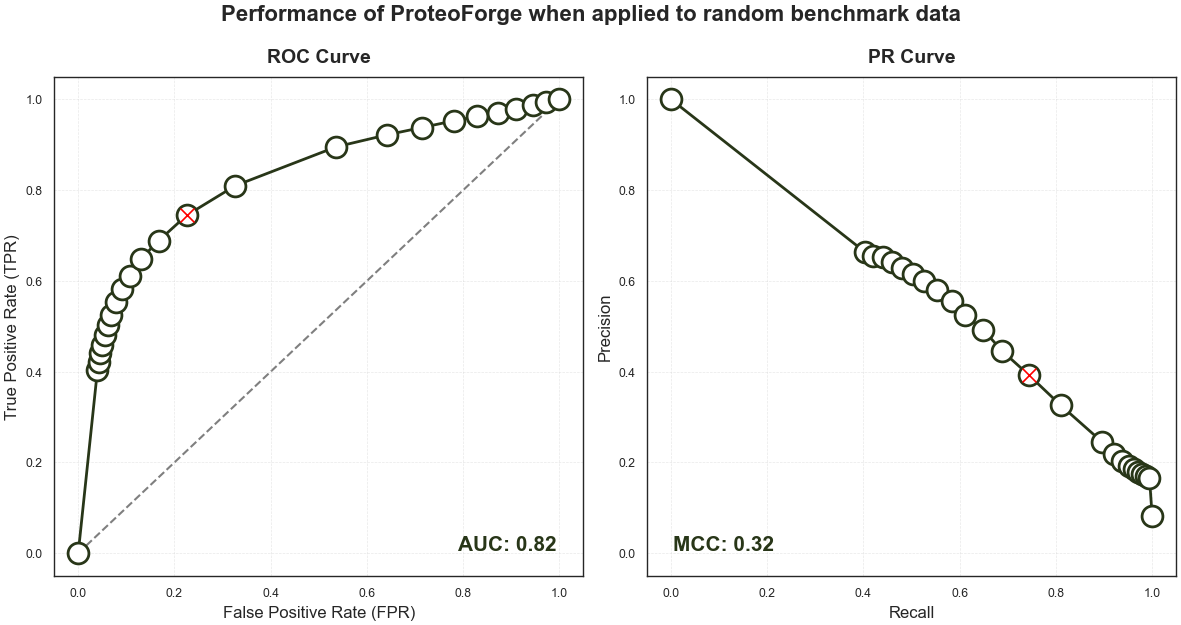

In [67]:
# Calculate the Metrics for thresholds
metric_data = utils.create_metric_data(
    res_data,
    thresholds,
    label_col="perturbed_peptide",
    pvalue_col=pval_col,
)

_ = plots.combined_curves(
    metric_data,
    prScore='MCC',
    title = f"Performance of {curMethod} when applied to {dataID} benchmark data",
    curve_line_color='#283618',
    curve_line_width=2,
)

In [68]:
print("Notebook Execution Time:", utils.prettyTimer(utils.getTime() - startTime))

Notebook Execution Time: 01h:07m:03s
